# Traffic Sign Classification

by Uki D. Lucas

** Self-Driving Car Engineer Nanodegree - Deep Learning **

# Overview

Design and implement a deep learning model that learns to recognize traffic signs. 

Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

**Table of Contents**
<div id="toc"></div>

# Hyper-parameters

I set the hyperparameters on top of the notebook for convenience of easy adjusting them

In [1]:
# Hyperparameters
# Arguments used for tf.truncated_normal, 
# which randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.3

EPOCHS = 100 # more the better, but longer, 6 achieve 98%
BATCH_SIZE = 512 #  OK larger is faster, memory limited
# on MacBook Pro 2.3GHz i7, 16GB 1600MHz DDR3 RAM: 
# 128 (slowest), 256 (faster), 512 (slower)
DROPOUT = 0.80 # 0.75

In [2]:
import tensorflow as tf

In [3]:
from tqdm import tqdm
# tqdm shows a smart progress meter
# usage: tqdm(iterable)

# Load The Data

In [4]:
# Load pickled German street signs dataset from:
# http://bit.ly/german_street_signs_dataset
# If file location is not correct you get
# FileNotFoundError: [Errno 2] No such file or directory
training_file = "/Users/ukilucas/dev/DATA/traffic-signs-data/train.p" # 120.7MB
testing_file = "/Users/ukilucas/dev/DATA/traffic-signs-data/test.p" # 38.9 MB

import pickle

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
# Make sure the number of images in TRAIN set matches the number of labels
assert(len(X_train) == len(y_train))

# Make sure the number of images in TEST set matches the number of labels
assert(len(X_test) == len(y_test))

# name 'X_validation' is not defined
# assert(len(X_validation) == len(y_validation)) 

In [6]:
# print example of one image to see the dimentions of data
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
# Image Shape: (32, 32, 3) - good for LeNet, no need for padding with zero


Image Shape: (32, 32, 3)



In [7]:
# print size of each set
training_set_size = len(X_train)
print("Training Set:   {} samples".format(training_set_size))
# Training Set:   39209 samples

testing_set_size = len(X_test)
print("Test Set:       {} samples".format(testing_set_size))
# Test Set:       12630 samples

#print("Validation Set: {} samples".format(len(X_validation)))

Training Set:   39209 samples
Test Set:       12630 samples


---

# Dataset Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

## CRITERIA: Dataset Summary

MEETS SPECIFICATIONS:
Student performs basic data summary.

In [8]:
import numpy as np

In [9]:
### Replace each question mark with the appropriate value.
 
# TODO: Number of training examples
# Training Set:   39209 samples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
# Test Set:       12630 samples
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
# Image Shape: (32, 32, 3)
image_shape = X_test.shape[1:3]

input_image_size = 32
number_of_channels = 3 # trying to keep color

# TODO: How many unique classes/labels there are in the dataset.
# see signnames.csv 43 elements (0 to 42)
number_train_labels = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes (training labels) =", number_train_labels)

np.unique(y_train)

# Output:
# Number of training examples = 39209
# Number of testing examples = 12630
# Image data shape = (32, 32)
# Number of classes = 43

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes (training labels) = 43


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

## CRITERIA: Exploratory Visualization

MEETS SPECIFICATIONS: 
Student performs an exploratory visualization on the dataset.

Overview:

Visualize the German Traffic Signs Dataset using the pickled file(s). 
This is open ended, suggestions include: plotting traffic sign images, 
plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, 
come back to it after you've completed the rest of the sections.

In [10]:
def human_readable_sign_names(sign_number):
    return {
        0: "Speed limit (20km/h)",
        1: "Speed limit (30km/h)",
        2: "Speed limit (50km/h)",
        3: "Speed limit (60km/h)",
        4: "Speed limit (70km/h)",
        5: "Speed limit (80km/h)",
        6: "End of speed limit (80km/h)",
        7: "Speed limit (100km/h)",
        8: "Speed limit (120km/h)",
        9: "No passing",
        10: "No passing for vehicles over 3.5 metric tons",
        11: "Right-of-way at the next intersection",
        12: "Priority road",
        13: "Yield",
        14: "Stop",
        15: "No vehicles",
        16: "Vehicles over 3.5 metric tons prohibited",
        17: "No entry",
        18: "General caution",
        19: "Dangerous curve to the left",
        20: "Dangerous curve to the right",
        21: "Double curve",
        22: "Bumpy road",
        23: "Slippery road",
        24: "Road narrows on the right",
        25: "Road work",
        26: "Traffic signals",
        27: "Pedestrians",
        28: "Children crossing",
        29: "Bicycles crossing",
        30: "Beware of ice/snow",
        31: "Wild animals crossing",
        32: "End of all speed and passing limits",
        33: "Turn right ahead",
        34: "Turn left ahead",
        35: "Ahead only",
        36: "Go straight or right",
        37: "Go straight or left",
        38: "Keep right",
        39: "Keep left",
        40: "Roundabout mandatory",
        41: "End of no passing",
        42: "End of no passing by vehicles over 3.5 metric tons"
    }.get(sign_number, "Error: sign not found") # default if x not found

# TEST function
print( human_readable_sign_names(0))
print( human_readable_sign_names(28))
print( human_readable_sign_names(42))
print( human_readable_sign_names(43))

Speed limit (20km/h)
Children crossing
End of no passing by vehicles over 3.5 metric tons
Error: sign not found


100%|██████████| 5/5 [00:00<00:00,  7.96it/s]


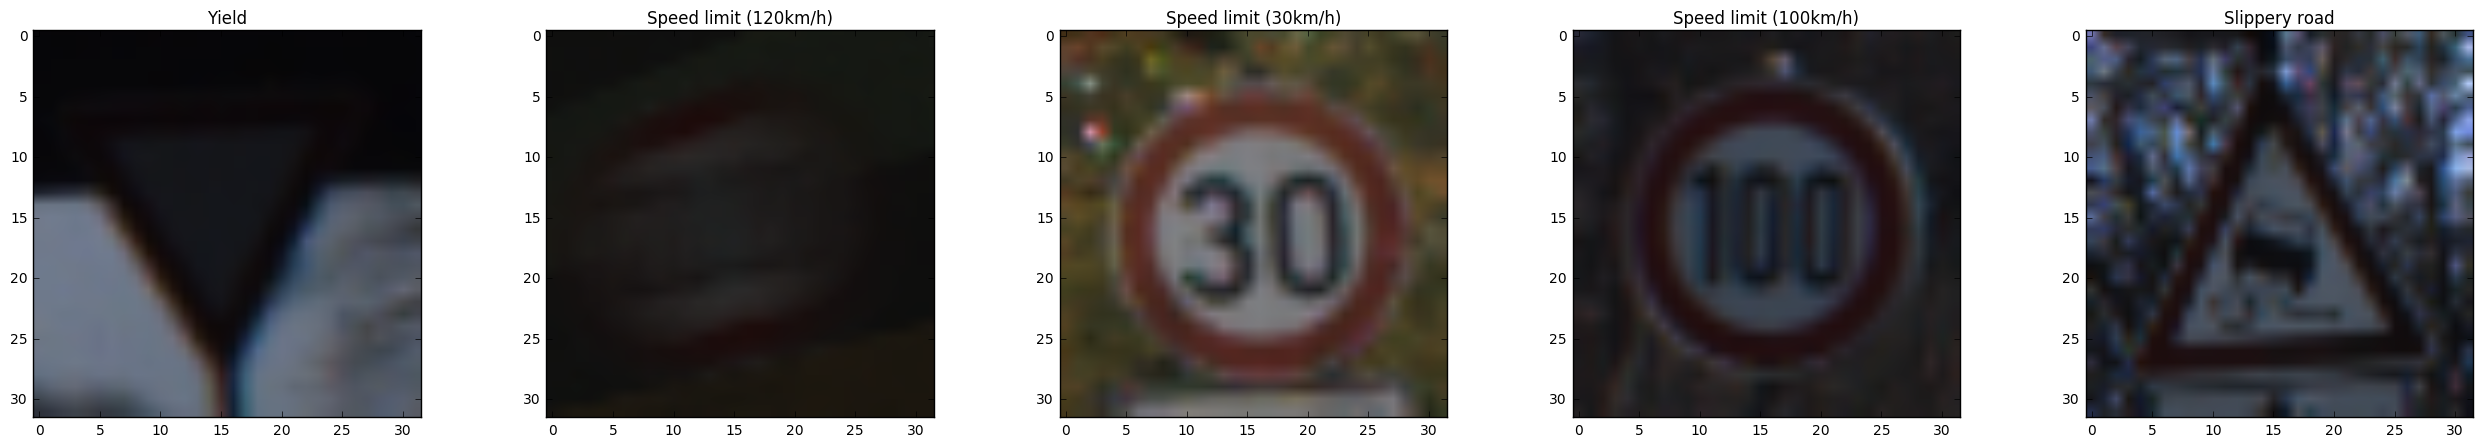

In [11]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline


import random
# import numpy as np # already imported
import matplotlib.pyplot as plt
%matplotlib inline

sample_size = 5

plt.rcParams["figure.figsize"] = [32, 5]

# show 5 random images and their labels
for i in tqdm(range(sample_size)):
    # select random image index from training set
    index = random.randint(0, len(X_train))
    
    # get actual image
    image = X_train[index].squeeze()
    plt.subplot(1, sample_size, i + 1)
    plt.title(human_readable_sign_names(y_train[index]))
    plt.imshow(image) # not gray: plt.imshow(image, cmap="gray")

### Training Data Labels Distribution

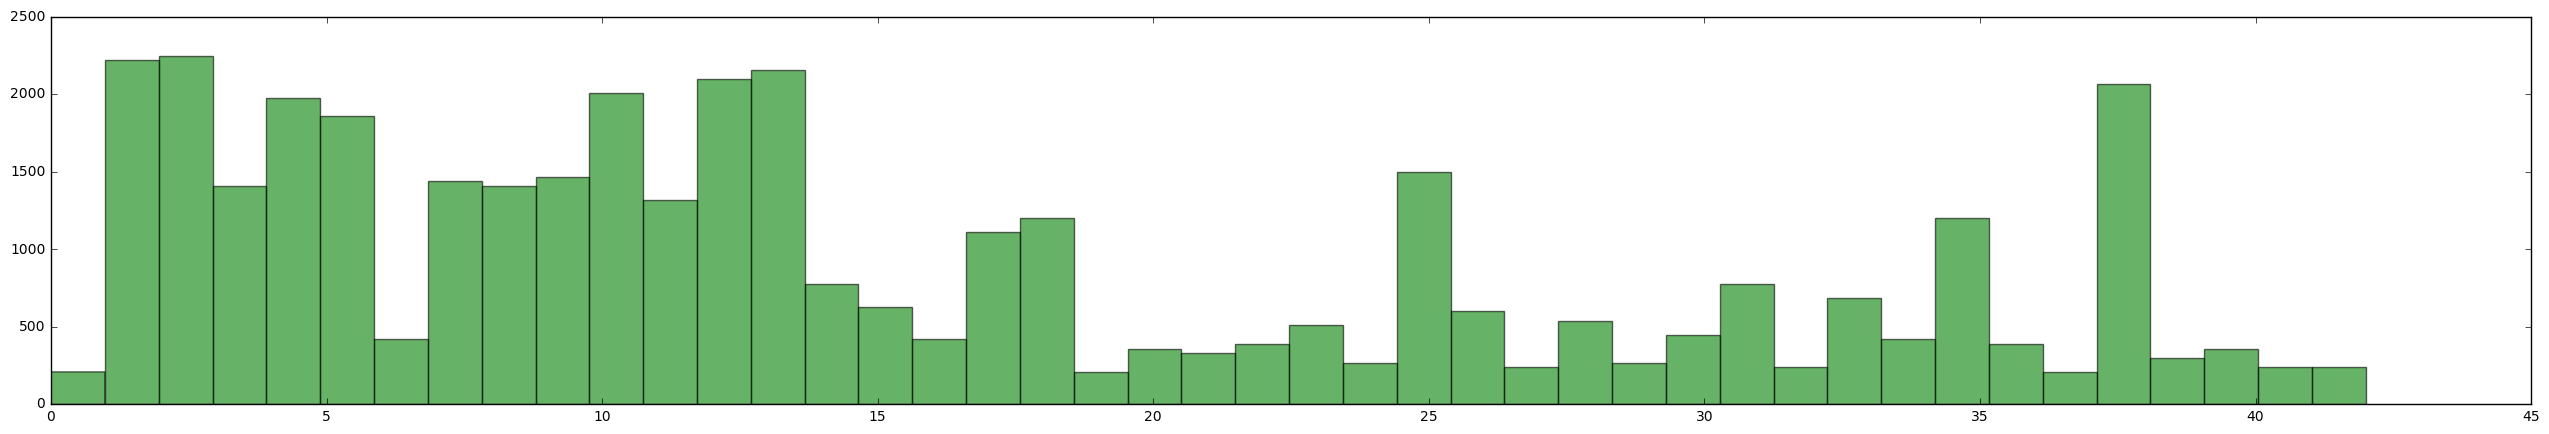

In [12]:
# train is the pickle file
histOut = plt.hist(train['labels'],number_train_labels, facecolor='g', alpha=0.60)

### Testing Data Labels Distribution

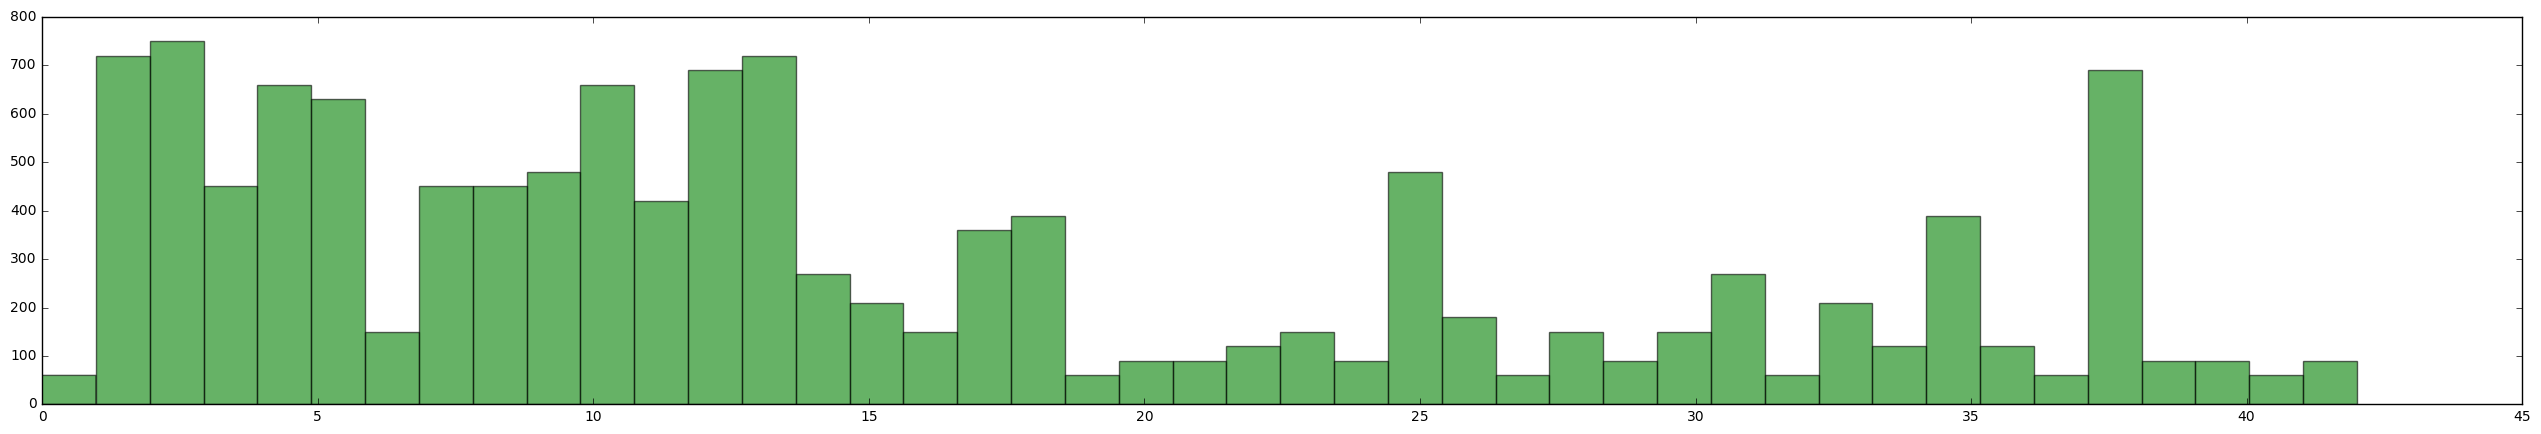

In [13]:
histOut = plt.hist(test['labels'],number_train_labels, facecolor='g', alpha=0.60)

---
# Design and Test a Model Architecture

## CRITERIA: Preprocessing
MEETS SPECIFICATIONS:
Students provides sufficient details of the preprocessing techniques used. Additionally, the student discusses why the techniques were chosen.



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

Answer:
- Shuffle given data each time to avoid image order ralated problems
- There is no need to resize the images as they are already 32x32
- I am keeping 3 color chanels as they should be beneficial in categorization
- image color depth scaling to values between -0.5 and +0.5
- Create validation set as 20% of the training set 

In [14]:
def scale_image_color_depth(value):
    """ 
    normalizes image color depth values 0..255
    to values between -0.5 and +0.5
    """
    # image color depth has values 0 to 255
    max_value = 255.0
    # take the half value = 127.5
    return ((value - max_value/2) / max_value)

# TEST:
print("normalized", scale_image_color_depth(0)) # min value
print("normalized", scale_image_color_depth(128)) # half value
print("normalized", scale_image_color_depth(255)) # max value
    

normalized -0.5
normalized 0.00196078431372549
normalized 0.5


In [15]:
def scale_image_color_depth_for_all(image_set):
    results = np.copy(image_set) # create placeholder
    for i in tqdm(range(image_set.shape[0])):
        results[i] = scale_image_color_depth(image_set[i].astype(float))
    return results

In [16]:
# Scale training set
train_features = scale_image_color_depth_for_all(X_train.astype(float))

100%|██████████| 39209/39209 [00:02<00:00, 13606.62it/s]


In [17]:
# Scale testing set
test_features = scale_image_color_depth_for_all(X_test.astype(float))

100%|██████████| 12630/12630 [00:00<00:00, 18027.82it/s]


#### Create validation set as 20% of the training set

Use scaled values of the training set.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- sklearn.cross_validation  train_test_split
- create 20% validation set from the training features set
- assert that the number of features is same as corresponding labels
- display the count of each

In [18]:
from sklearn.cross_validation import train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_validation, y_train, y_validation = train_test_split(train_features, 
                                                                y_train, 
                                                                test_size=0.20, 
                                                                random_state=42)

In [19]:
# Make sure the number of images in TRAIN set matches the number of labels
assert(len(X_train) == len(y_train))
print("len(X_train)", len(X_train))

# Make sure the number of images in TEST set matches the number of labels
assert(len(X_test) == len(y_test))
print("len(X_test)", len(X_test))

# name 'X_validation' is not defined
assert(len(X_validation) == len(y_validation))
print("len(X_validation)", len(X_validation))

len(X_train) 31367
len(X_test) 12630
len(X_validation) 7842


In [20]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Features and Labels

- `x` is a placeholder for a batch of input images.
- `y` is a placeholder for a batch of output labels.

In [21]:
# x variable (Tensor) stores input batches
# None - later accepts batch of any size
# image dimentions 32x32x1
x = tf.placeholder(tf.float32, (None, 
                                input_image_size, 
                                input_image_size, 
                                number_of_channels)) # (None, 32, 32, 3)

# y variable (Tensor) stores labels
y = tf.placeholder(tf.int32, (None)) # if using "None,number_of_channels" -> (None, 3)


# encode our labels
one_hot_y = tf.one_hot(y, number_train_labels) # 43

# See definition of the DROPOUT below
keep_prob = tf.placeholder(tf.float32)

---
## CRITERIA: Model Architecture

MEETS SPECIFICATIONS:
Student provides sufficient details of the characteristics and qualities of the architecture, such as the type of model used, the number of layers, the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.


### Convolutional Deep Neural Network

Implement the neural network architecture based on LeNet-5.


#### Input
The LeNet architecture accepts a 32x32xC number_color_channels. 

- MNIST images are grayscale, C is 1.
- German street sign images have **3 color channels**, C is 3.

#### Architecture
- Layer 1: Convolutional. The output shape should be 28x28x6.
- Activation. Your choice of activation function.
- Pooling. The output shape should be 14x14x6.
- Layer 2: Convolutional. The output shape should be 10x10x16.
- Activation. Your choice of activation function.
- Pooling. The output shape should be 5x5x16.
- Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
- Layer 3: Fully Connected. This should have 120 outputs.
- Activation. Your choice of activation function.
- Layer 4: Fully Connected. This should have 84 outputs.
- Activation. Your choice of activation function.
- Layer 5: Fully Connected (Logits). This should have 10 outputs.

#### Output
- Return the result of the 2nd fully connected layer.

In [22]:
def convolution_output_size(input_size=32, filter_size=5, stride_veritcal=1):
    output_size = (input_size - filter_size + 1)/stride_veritcal
    print("Calculated output size", output_size)

In [23]:
def pooling_layer(input_tensor):
    # POOLING (SUBSAMPLING) LAYER L2
    # Input = 28x28x6. 
    # Output = 14x14x6.
    # value: A 4-D Tensor with shape [batch, height, width, channels] and type tf.float32.
    # ksize: A list of ints that has length >= 4. The size of the window for each dimension of the input tensor.
    # strides: A list of ints that has length >= 4. The stride of the sliding window for each dimension of the input tensor.
    # padding: A string, either 'VALID' or 'SAME'. 
    # name: Optional name for the operation.
    tensor = tf.nn.max_pool(value = input_tensor, 
                           ksize=[1, 2, 2, 1], 
                           strides=[1, 2, 2, 1], 
                           padding='VALID')
    print("Pooling Layer Output", tensor)
    #L2 output Tensor("L2:0", shape=(?, 14, 14, 6), dtype=float32)
    return tensor

In [24]:
def convolution_layer(input_tensor, filter_size=5, input_depth=3, output_depth=6):
    # L1 filter (5,5,3,6)
    # L2 filter (5,5,6,16) 
    
    filter_tensor = tf.Variable(tf.truncated_normal(
            shape=(filter_size, 
                   filter_size, 
                   input_depth, 
                   output_depth), 
            mean = mu, 
            stddev = sigma))
    
    bias = tf.Variable(tf.zeros(output_depth))
    tensor = tf.nn.conv2d(input = input_tensor, 
                         filter = filter_tensor, 
                         strides = [1, 1, 1, 1], 
                         padding='VALID'
                        ) + bias
    
    convolution_output_size(input_size=32, filter_size=filter_size, stride_veritcal=1)
    # calculated output size 28.0
    
    print("Convolution Output", tensor)
    # L1 output Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
    
    # ReLU Activation function.
    tensor = tf.nn.relu(features = tensor)
    print("ReLU Output", tensor)
    # ReLU output Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
    
    tensor = pooling_layer(input_tensor = tensor)
    return tensor

In [25]:
def convolution_fully_connected(input_tensor, input_size=400, output_size=120):
    # Fully Connected. Input = 400. Output = 120.
    filter_tensor = tf.Variable(tf.truncated_normal(
            shape=(input_size, output_size), 
            mean = mu, stddev = sigma))
    
    bias = tf.Variable(tf.zeros(output_size))
    
    tensor   = tf.matmul(input_tensor, filter_tensor) + bias
    print("Convolution Output", tensor)
    
    # ReLu Activation.
    tensor    = tf.nn.relu(tensor)
    print("ReLU Output", tensor)
    return tensor

In [26]:
from tensorflow.contrib.layers import flatten


    
def convolutional_neural_network(tensor): 

    print("CONVOLUTIONAL LAYER L1")
    tensor = convolution_layer(
        input_tensor = tensor, filter_size=5, input_depth=3, output_depth=6)
    
    print("CONVOLUTIONAL LAYER L2")
    tensor = convolution_layer(
        input_tensor = tensor, filter_size=5, input_depth=6, output_depth=16)

    # Input Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
    print("FLATTENING LAYER L3")
    # Flattens Input 5x5x16 = 400
    tensor   = flatten(tensor)
    print("Flattened Output", tensor)
    
    # Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
    
    print("CONVOLUTIONAL FULLY CONNECTED LAYER L4")
    tensor = convolution_fully_connected(input_tensor=tensor, input_size=400, output_size=120)
    # Convolution output tensor Tensor("add_2:0", shape=(?, 120), dtype=float32)
    # ReLU output tensor Tensor("Relu_2:0", shape=(?, 120), dtype=float32)
    
    print("CONVOLUTIONAL FULLY CONNECTED LAYER L5")
    tensor = convolution_fully_connected(input_tensor=tensor, input_size=120, output_size=84)
    # Convolution output tensor Tensor("add_3:0", shape=(?, 84), dtype=float32)
    #ReLU output tensor Tensor("Relu_3:0", shape=(?, 84), dtype=float32)
    
    print("CONVOLUTIONAL FULLY CONNECTED LAYER L6")
    tensor = convolution_fully_connected(input_tensor=tensor, input_size=84, output_size=43)
    # Convolution output tensor Tensor("add_4:0", shape=(?, 43), dtype=float32)
    # ReLU output tensor Tensor("Relu_4:0", shape=(?, 43), dtype=float32)
    
    return tensor # logits

## CRITERIA: Dataset and Training
MEETS SPECIFICATIONS:
Student describes how the model was trained and evaluated. If the student generated additional data they discuss their process and reasoning. Additionally, the student discusses the difference between the new dataset with additional data, and the original dataset.



- Run the training data through the training pipeline to train the model.
- Before each epoch, shuffle the training set.
- After each epoch, measure the loss and accuracy of the validation set.
- Save the model after training.

Create a training pipeline that uses the model to classify sign data.

In [27]:
logits = convolutional_neural_network(x)

CONVOLUTIONAL LAYER L1
Calculated output size 28.0
Convolution Output Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
ReLU Output Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
Pooling Layer Output Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
CONVOLUTIONAL LAYER L2
Calculated output size 28.0
Convolution Output Tensor("add_1:0", shape=(?, 10, 10, 16), dtype=float32)
ReLU Output Tensor("Relu_1:0", shape=(?, 10, 10, 16), dtype=float32)
Pooling Layer Output Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
FLATTENING LAYER L3
Flattened Output Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
CONVOLUTIONAL FULLY CONNECTED LAYER L4
Convolution Output Tensor("add_2:0", shape=(?, 120), dtype=float32)
ReLU Output Tensor("Relu_2:0", shape=(?, 120), dtype=float32)
CONVOLUTIONAL FULLY CONNECTED LAYER L5
Convolution Output Tensor("add_3:0", shape=(?, 84), dtype=float32)
ReLU Output Tensor("Relu_3:0", shape=(?, 84), dtype=float32)
CONVOLUTIONAL FULLY CONNECT

### Question 3: Architecture of CDNN

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**

CONVOLUTIONAL LAYER L1
- Calculated output size 28.0
- Convolution Output Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
- ReLU Output Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
- Pooling Layer Output Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)

CONVOLUTIONAL LAYER L2
- Calculated output size 28.0
- Convolution Output Tensor("add_1:0", shape=(?, 10, 10, 16), dtype=float32)
- ReLU Output Tensor("Relu_1:0", shape=(?, 10, 10, 16), dtype=float32)
- Pooling Layer Output Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)

FLATTENING LAYER L3
- Flattened Output Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
- CONVOLUTIONAL FULLY CONNECTED LAYER L4
- Convolution Output Tensor("add_2:0", shape=(?, 120), dtype=float32)
- ReLU Output Tensor("Relu_2:0", shape=(?, 120), dtype=float32)

CONVOLUTIONAL FULLY CONNECTED LAYER L5
- Convolution Output Tensor("add_3:0", shape=(?, 84), dtype=float32)
- ReLU Output Tensor("Relu_3:0", shape=(?, 84), dtype=float32)

CONVOLUTIONAL FULLY CONNECTED LAYER L6
- Convolution Output Tensor("add_4:0", shape=(?, 43), dtype=float32)
- ReLU Output Tensor("Relu_4:0", shape=(?, 43), dtype=float32)


### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

#### Softmax Cross Entropy

Cross Entropy is the measure of how different are 
the logits (output classes) from ground truth training labels

In [28]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
print(cross_entropy)

# average entropy from all the training images
mean_loss_tensor = tf.reduce_mean(cross_entropy)
print("mean_loss_tensor",mean_loss_tensor)



Tensor("Reshape_2:0", shape=(?,), dtype=float32)
mean_loss_tensor Tensor("Mean:0", shape=(), dtype=float32)


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

#### Adam optimizer

This is a minimize the loss function (similar to Stockastic Gradient Decent SGD does)

AdamOptimizer is more sofisticated, so it is a good default.

It uses moving averages of the parameters (momentum); 
Bengio discusses the reasons for why this is beneficial in Section 3.1.1 of this paper. 

Simply put, this enables Adam to use a larger effective step size (rate), 
and the algorithm will converge to this step size without fine tuning

In [29]:
def print_hyper_parameters():
    print("- mu", mu)
    print("- sigma", sigma)
    print("- EPOCHS", EPOCHS, "more the better, but achieving > 98% is a proof") 
    print("- BATCH SIZE", BATCH_SIZE, "best results with 256 on my computer") 
    print("- DROPOUT", DROPOUT, "used for keep_prob") 
    
print_hyper_parameters()

- mu 0
- sigma 0.3
- EPOCHS 100 more the better, but achieving > 98% is a proof
- BATCH SIZE 512 best results with 256 on my computer
- DROPOUT 0.8 used for keep_prob


#### Dropout

To reduce overfitting, we will apply dropout before the readout layer. We create a placeholder for the probability that a neuron's output is kept during dropout. This allows us to turn dropout on during training, and turn it off during testing. TensorFlow's tf.nn.dropout op automatically handles scaling neuron outputs in addition to masking them, so dropout just works without any additional scaling.1

In [30]:
# learning rate (how quickly to update the networks weights)
rate = 0.001

adam_optimizer = tf.train.AdamOptimizer(learning_rate = rate)
print("adam_optimizer", adam_optimizer)

# uses backpropagation 
adam_optimizer_minimize = adam_optimizer.minimize(mean_loss_tensor)
print("adam_optimizer_minimize", adam_optimizer_minimize)

adam_optimizer <tensorflow.python.training.adam.AdamOptimizer object at 0x13941e4e0>
adam_optimizer_minimize name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/update_Variable_3/ApplyAdam"
input: "^Adam/update_Variable_4/ApplyAdam"
input: "^Adam/update_Variable_5/ApplyAdam"
input: "^Adam/update_Variable_6/ApplyAdam"
input: "^Adam/update_Variable_7/ApplyAdam"
input: "^Adam/update_Variable_8/ApplyAdam"
input: "^Adam/update_Variable_9/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [31]:
# is prediction correct
are_preditions_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
print("are_preditions_correct", are_preditions_correct)

# calc model's overall accuracy by avegaring individual prediction acuracies 
predition_mean = tf.reduce_mean(tf.cast(are_preditions_correct, tf.float32))
print("predition_mean", predition_mean)


are_preditions_correct Tensor("Equal:0", dtype=bool)
predition_mean Tensor("Mean_1:0", dtype=float32)


In [32]:
def evaluate(X_data, y_data):
    num_examples = len(X_data) # training_set_size
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(predition_mean, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [33]:
import time
start = time.time()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print_hyper_parameters()
    print()
    for i in range(EPOCHS):
        # shuffle: make sure it is not biased by the order of images
        X_train, y_train = shuffle(X_train, y_train)
        
        # break training model into batches,
        # train the model on each batch
        for offset in range(0, training_set_size, BATCH_SIZE):
            end = offset + BATCH_SIZE
            # print("running batch from", offset, " step ", end, " up to ", training_set_size)
            batch_x = X_train[offset:end]
            batch_y = y_train[offset:end]
             
            sess.run(adam_optimizer_minimize, 
                     feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
            
        # at the end of each epoch, evaluate against validation set
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1),
              "Validation Accuracy = {:.3f}".format(validation_accuracy))
        # EPOCH 1 ... Validation Accuracy = 0.300 - very low
        # EPOCH 2 ... Validation Accuracy = 0.500 - growing
        # training for 2 epochs and 256 batch size took 41.1 seconds
        print()
    
    end = time.time()
    print('Training for {} epochs and {} batch size took {} seconds'.format(
            EPOCHS, BATCH_SIZE, round(end - start,1)))
        
    # upon training complete, save it so we do not have to train again
    saver.save(sess, './model_00001')
    print("Model saved")
    

Training...
- mu 0
- sigma 0.3
- EPOCHS 100 more the better, but achieving > 98% is a proof
- BATCH SIZE 512 best results with 256 on my computer
- DROPOUT 0.8 used for keep_prob



100%|██████████| 16/16 [00:03<00:00,  4.91it/s]


EPOCH 1 ... Validation Accuracy = 0.181



100%|██████████| 16/16 [00:03<00:00,  4.28it/s]


EPOCH 2 ... Validation Accuracy = 0.303



100%|██████████| 16/16 [00:03<00:00,  5.16it/s]


EPOCH 3 ... Validation Accuracy = 0.384



100%|██████████| 16/16 [00:02<00:00,  5.44it/s]


EPOCH 4 ... Validation Accuracy = 0.442



100%|██████████| 16/16 [00:03<00:00,  5.02it/s]


EPOCH 5 ... Validation Accuracy = 0.466



100%|██████████| 16/16 [00:02<00:00,  5.70it/s]


EPOCH 6 ... Validation Accuracy = 0.529



100%|██████████| 16/16 [00:02<00:00,  5.62it/s]


EPOCH 7 ... Validation Accuracy = 0.562



100%|██████████| 16/16 [00:02<00:00,  5.53it/s]


EPOCH 8 ... Validation Accuracy = 0.606



100%|██████████| 16/16 [00:02<00:00,  5.68it/s]


EPOCH 9 ... Validation Accuracy = 0.602



100%|██████████| 16/16 [00:02<00:00,  5.76it/s]


EPOCH 10 ... Validation Accuracy = 0.667



100%|██████████| 16/16 [00:02<00:00,  5.75it/s]


EPOCH 11 ... Validation Accuracy = 0.674



100%|██████████| 16/16 [00:02<00:00,  5.77it/s]


EPOCH 12 ... Validation Accuracy = 0.692



100%|██████████| 16/16 [00:02<00:00,  5.66it/s]


EPOCH 13 ... Validation Accuracy = 0.695



100%|██████████| 16/16 [00:02<00:00,  5.51it/s]


EPOCH 14 ... Validation Accuracy = 0.687



100%|██████████| 16/16 [00:02<00:00,  5.65it/s]


EPOCH 15 ... Validation Accuracy = 0.717



100%|██████████| 16/16 [00:02<00:00,  5.39it/s]


EPOCH 16 ... Validation Accuracy = 0.728



100%|██████████| 16/16 [00:02<00:00,  5.61it/s]


EPOCH 17 ... Validation Accuracy = 0.716



100%|██████████| 16/16 [00:02<00:00,  5.38it/s]


EPOCH 18 ... Validation Accuracy = 0.732



100%|██████████| 16/16 [00:02<00:00,  5.58it/s]


EPOCH 19 ... Validation Accuracy = 0.753



100%|██████████| 16/16 [00:03<00:00,  5.15it/s]


EPOCH 20 ... Validation Accuracy = 0.738



100%|██████████| 16/16 [00:03<00:00,  5.31it/s]


EPOCH 21 ... Validation Accuracy = 0.742



100%|██████████| 16/16 [00:02<00:00,  5.54it/s]


EPOCH 22 ... Validation Accuracy = 0.747



100%|██████████| 16/16 [00:03<00:00,  4.69it/s]


EPOCH 23 ... Validation Accuracy = 0.738



100%|██████████| 16/16 [00:02<00:00,  5.09it/s]


EPOCH 24 ... Validation Accuracy = 0.763



100%|██████████| 16/16 [00:02<00:00,  6.18it/s]


EPOCH 25 ... Validation Accuracy = 0.752



100%|██████████| 16/16 [00:02<00:00,  5.57it/s]


EPOCH 26 ... Validation Accuracy = 0.768



100%|██████████| 16/16 [00:03<00:00,  5.17it/s]


EPOCH 27 ... Validation Accuracy = 0.762



100%|██████████| 16/16 [00:02<00:00,  5.35it/s]


EPOCH 28 ... Validation Accuracy = 0.773



100%|██████████| 16/16 [00:02<00:00,  5.34it/s]


EPOCH 29 ... Validation Accuracy = 0.738



100%|██████████| 16/16 [00:03<00:00,  4.99it/s]


EPOCH 30 ... Validation Accuracy = 0.775



100%|██████████| 16/16 [00:02<00:00,  5.34it/s]


EPOCH 31 ... Validation Accuracy = 0.764



100%|██████████| 16/16 [00:02<00:00,  5.67it/s]


EPOCH 32 ... Validation Accuracy = 0.769



100%|██████████| 16/16 [00:03<00:00,  4.65it/s]


EPOCH 33 ... Validation Accuracy = 0.784



100%|██████████| 16/16 [00:03<00:00,  5.02it/s]


EPOCH 34 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:02<00:00,  6.00it/s]


EPOCH 35 ... Validation Accuracy = 0.784



100%|██████████| 16/16 [00:02<00:00,  5.91it/s]


EPOCH 36 ... Validation Accuracy = 0.782



100%|██████████| 16/16 [00:02<00:00,  5.54it/s]


EPOCH 37 ... Validation Accuracy = 0.781



100%|██████████| 16/16 [00:02<00:00,  5.62it/s]


EPOCH 38 ... Validation Accuracy = 0.780



100%|██████████| 16/16 [00:03<00:00,  5.60it/s]


EPOCH 39 ... Validation Accuracy = 0.781



100%|██████████| 16/16 [00:02<00:00,  5.27it/s]


EPOCH 40 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:02<00:00,  5.75it/s]


EPOCH 41 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:02<00:00,  5.72it/s]


EPOCH 42 ... Validation Accuracy = 0.783



100%|██████████| 16/16 [00:02<00:00,  5.61it/s]


EPOCH 43 ... Validation Accuracy = 0.789



100%|██████████| 16/16 [00:02<00:00,  5.60it/s]


EPOCH 44 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:02<00:00,  5.65it/s]


EPOCH 45 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:03<00:00,  5.28it/s]


EPOCH 46 ... Validation Accuracy = 0.790



100%|██████████| 16/16 [00:02<00:00,  5.49it/s]


EPOCH 47 ... Validation Accuracy = 0.789



100%|██████████| 16/16 [00:02<00:00,  5.82it/s]


EPOCH 48 ... Validation Accuracy = 0.786



100%|██████████| 16/16 [00:02<00:00,  5.71it/s]


EPOCH 49 ... Validation Accuracy = 0.787



100%|██████████| 16/16 [00:02<00:00,  5.73it/s]


EPOCH 50 ... Validation Accuracy = 0.791



100%|██████████| 16/16 [00:02<00:00,  5.75it/s]


EPOCH 51 ... Validation Accuracy = 0.792



100%|██████████| 16/16 [00:02<00:00,  5.58it/s]


EPOCH 52 ... Validation Accuracy = 0.793



100%|██████████| 16/16 [00:02<00:00,  5.49it/s]


EPOCH 53 ... Validation Accuracy = 0.793



100%|██████████| 16/16 [00:02<00:00,  5.52it/s]


EPOCH 54 ... Validation Accuracy = 0.794



100%|██████████| 16/16 [00:02<00:00,  5.75it/s]


EPOCH 55 ... Validation Accuracy = 0.796



100%|██████████| 16/16 [00:02<00:00,  5.67it/s]


EPOCH 56 ... Validation Accuracy = 0.796



100%|██████████| 16/16 [00:02<00:00,  5.65it/s]


EPOCH 57 ... Validation Accuracy = 0.793



100%|██████████| 16/16 [00:02<00:00,  5.55it/s]


EPOCH 58 ... Validation Accuracy = 0.785



100%|██████████| 16/16 [00:02<00:00,  5.65it/s]


EPOCH 59 ... Validation Accuracy = 0.673



100%|██████████| 16/16 [00:02<00:00,  5.43it/s]


EPOCH 60 ... Validation Accuracy = 0.757



100%|██████████| 16/16 [00:03<00:00,  5.17it/s]


EPOCH 61 ... Validation Accuracy = 0.792



100%|██████████| 16/16 [00:03<00:00,  5.73it/s]


EPOCH 62 ... Validation Accuracy = 0.791



100%|██████████| 16/16 [00:02<00:00,  5.56it/s]


EPOCH 63 ... Validation Accuracy = 0.797



100%|██████████| 16/16 [00:02<00:00,  5.81it/s]


EPOCH 64 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:02<00:00,  5.64it/s]


EPOCH 65 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:03<00:00,  5.07it/s]


EPOCH 66 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:03<00:00,  4.90it/s]


EPOCH 67 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:02<00:00,  5.71it/s]


EPOCH 68 ... Validation Accuracy = 0.799



100%|██████████| 16/16 [00:03<00:00,  5.30it/s]


EPOCH 69 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:02<00:00,  5.63it/s]


EPOCH 70 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:03<00:00,  5.49it/s]


EPOCH 71 ... Validation Accuracy = 0.801



100%|██████████| 16/16 [00:03<00:00,  5.25it/s]


EPOCH 72 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:03<00:00,  5.08it/s]


EPOCH 73 ... Validation Accuracy = 0.801



100%|██████████| 16/16 [00:02<00:00,  5.46it/s]


EPOCH 74 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:02<00:00,  5.43it/s]


EPOCH 75 ... Validation Accuracy = 0.800



100%|██████████| 16/16 [00:02<00:00,  5.45it/s]


EPOCH 76 ... Validation Accuracy = 0.799



100%|██████████| 16/16 [00:03<00:00,  5.19it/s]


EPOCH 77 ... Validation Accuracy = 0.799



100%|██████████| 16/16 [00:01<00:00,  8.16it/s]


EPOCH 78 ... Validation Accuracy = 0.776



100%|██████████| 16/16 [00:01<00:00,  8.13it/s]


EPOCH 79 ... Validation Accuracy = 0.788



100%|██████████| 16/16 [00:02<00:00,  7.64it/s]


EPOCH 80 ... Validation Accuracy = 0.778



100%|██████████| 16/16 [00:01<00:00,  8.10it/s]


EPOCH 81 ... Validation Accuracy = 0.794



100%|██████████| 16/16 [00:01<00:00,  8.22it/s]


EPOCH 82 ... Validation Accuracy = 0.792



100%|██████████| 16/16 [00:02<00:00,  7.38it/s]


EPOCH 83 ... Validation Accuracy = 0.794



100%|██████████| 16/16 [00:01<00:00,  8.12it/s]


EPOCH 84 ... Validation Accuracy = 0.798



100%|██████████| 16/16 [00:01<00:00,  8.17it/s]


EPOCH 85 ... Validation Accuracy = 0.801



100%|██████████| 16/16 [00:02<00:00,  7.72it/s]


EPOCH 86 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:01<00:00,  8.19it/s]


EPOCH 87 ... Validation Accuracy = 0.802



100%|██████████| 16/16 [00:02<00:00,  7.98it/s]


EPOCH 88 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  7.25it/s]


EPOCH 89 ... Validation Accuracy = 0.802



100%|██████████| 16/16 [00:01<00:00,  8.10it/s]


EPOCH 90 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  6.35it/s]


EPOCH 91 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  6.77it/s]


EPOCH 92 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  6.81it/s]


EPOCH 93 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:01<00:00,  8.07it/s]


EPOCH 94 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  7.31it/s]


EPOCH 95 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:01<00:00,  8.13it/s]


EPOCH 96 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:01<00:00,  8.14it/s]


EPOCH 97 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  7.70it/s]


EPOCH 98 ... Validation Accuracy = 0.802



100%|██████████| 16/16 [00:01<00:00,  8.09it/s]


EPOCH 99 ... Validation Accuracy = 0.803



100%|██████████| 16/16 [00:02<00:00,  7.89it/s]


EPOCH 100 ... Validation Accuracy = 0.803

Training for 100 epochs and 512 batch size took 3649.5 seconds
Model saved


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

- I have started with LeNet architecture as is was recommended in class
- Made sure it runs on MINST dataset
- Made sure to change it to German signs (32x32x3)
- Stepped thru each piece of functionality, refactored names, functions  to understand it better
- Looked up most of the functions in TensorFlow official documentation
- Started to play with Hyper-parameters to get better results
- I am not good enough yet to start switching the architecture



Training...
- mu 0
- sigma 0.3
- EPOCHS 100 more the better, but achieving > 98% is a proof
- BATCH SIZE 512 best results with 256 on my computer
- DROPOUT 0.8 used for keep_prob

100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
EPOCH 1 ... Validation Accuracy = 0.181


100%|██████████| 16/16 [00:01<00:00,  8.14it/s]
EPOCH 97 ... Validation Accuracy = 0.803

100%|██████████| 16/16 [00:02<00:00,  7.70it/s]
EPOCH 98 ... Validation Accuracy = 0.802

100%|██████████| 16/16 [00:01<00:00,  8.09it/s]
EPOCH 99 ... Validation Accuracy = 0.803

100%|██████████| 16/16 [00:02<00:00,  7.89it/s]
EPOCH 100 ... Validation Accuracy = 0.803

Training for 100 epochs and 512 batch size took 3649.5 seconds
Model saved

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [34]:
with tf.Session() as sess:
    print ('Re-loading saved ./model_00001')
    saver.restore(sess,   './model_00001')

    test_accuracy = evaluate(X_test, y_test)
    print("After running the TEST set agaist save model I get = {:.3f}".format(test_accuracy))

  0%|          | 0/25 [00:00<?, ?it/s]

Re-loading saved ./model_00001


100%|██████████| 25/25 [00:03<00:00,  7.43it/s]

After running the TEST set agaist save model I get = 0.695


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._


**Answer**

Yes, some of the images in the training set are not readable to me. The error rate on them, I assume might be high.

![title](images/example_5.png)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [93]:
import os
directory = "images/verification/"
listing = os.listdir(directory)
print (len(listing))
listing

30


['.DS_Store',
 '1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.jpg',
 '30.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

ignoring .DS_Store
0 1.jpg
1 10.jpg
2 11.jpg
3 12.jpg
4 13.jpg
5 14.jpg
6 15.jpg
7 16.jpg
8 17.jpg
9 18.jpg
10 19.jpg
11 2.jpg
12 20.jpg
13 21.jpg
14 22.jpg
15 23.jpg
16 24.jpg
17 25.jpg
18 27.jpg
19 28.jpg
20 29.jpg
21 3.jpg
22 30.jpg
23 4.jpg
24 5.jpg
25 6.jpg
26 7.jpg
27 8.jpg
28 9.jpg


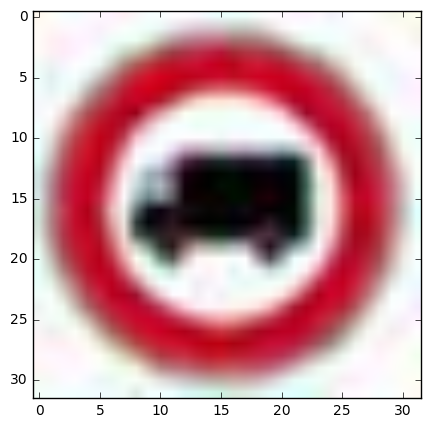

In [101]:
from skimage import io
 
image_matrix = np.uint8(np.zeros((30, 32, 32, 3))) # I know I have 30 images

counter = -1
for i in range(len(listing)):
    if ".jpg" not in listing[i]: 
        print("ignoring", listing[i])
        continue
    counter = counter + 1
    image_array = io.imread(directory + listing[i])
    image_matrix[i-1] = image_array
    print(counter, listing[i])
    
    
image_matrix.shape
plt.imshow(image_matrix[counter])

In [102]:
test_img_data = scale_image_color_depth_for_all(
    image_matrix.reshape((-1, 32, 32, 3)).astype(float))

100%|██████████| 30/30 [00:00<00:00, 36272.45it/s]


100%|██████████| 8/8 [00:00<00:00, 24.72it/s]


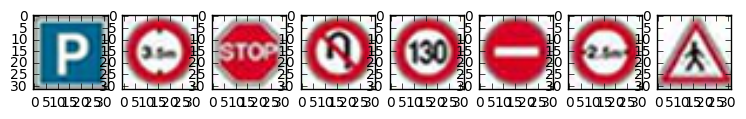

In [108]:
plt.rcParams["figure.figsize"] = [32, 5]

 
for i in tqdm(range(8)):
    image = image_matrix[i].squeeze()
    plt.subplot(1, counter, i + 1)
    #plt.title(human_readable_sign_names(y_train[index]))
    plt.imshow(image) # not gray: plt.imshow(image, cmap="gray")

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [123]:
softmax_tensor = tf.nn.softmax(logits)

def classify_images(X_data):
    session = tf.get_default_session()
    predicted_tensor = session.run(softmax_tensor, feed_dict={x: X_data, keep_prob: 0.8})
    return predicted_tensor
    
with tf.Session() as sess:
    print ('Re-loading saved ./model_00001')
    saver.restore(sess,   './model_00001')
    
    predictions = classify_images(test_img_data)
    top_k_tensor = sess.run(tf.nn.top_k(predictions, 5, sorted=True))
    label_indexes = np.argmax(top_k_tensor, 1)
    #print("Predicted Labels:", label_indexes)

values=  label_indexes[1,1:]  
print (values)
for index in tqdm(range(len(values))):
    print(human_readable_sign_names(values[index]))

Re-loading saved ./model_00001


100%|██████████| 4/4 [00:00<00:00, 48210.39it/s]

[11  6 19  0]
Right-of-way at the next intersection
End of speed limit (80km/h)
Dangerous curve to the left
Speed limit (20km/h)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.